# Data analysis

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.interpolate
import os
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)

# only with Python2.7 !!
import sys
sys.path.insert(0,'/usr/lib/python2.7/pyobs-master/')
from pyobs import *

In [2]:
def round_on_error(value, error):
    significant_digits = 1-int(math.floor(math.log(error, 10)))
    return round(value,significant_digits)

def get_2_significant(value):
    return round(value,1-int(math.floor(math.log(value, 10))))

def get_2_significant_0(value):
    return int(round(10.0/(10.0**int(math.floor(math.log(value, 10))))*value,0))

def get_position_sign(error):
    return 1-int(math.floor(math.log(error, 10)))
   
# Function that given a value and an error returns value(error) with two significant digits.    
def printwe(value,error):
    e = get_2_significant(error)
    a = get_position_sign(e)
    e = get_2_significant_0(error)
    stri = '{:.' + str(a) + 'f}({})' 
    print(stri.format(value,e))

## Observables

|Algorithm|Statistics| $Q$| $\tau_{\text{int}}$ | $\tau_{\text{int}}/\tau_{\text{int}}^{\text{(HMC)}}$
|:-:|:-:|:-:|:-:|:-:|
|HMC| {{Nhmc}} | {{printwe(Qhmc,eQhmc)}}| {{printwe(tauQhmc, etauQhmc)}} | - |
|Alt Winding| {{Naltw}} | {{printwe(Qaltw,eQaltw)}}| {{printwe(tauQaltw, etauQaltw)}} | {{printwe(tauR_Qaltw, etauR_Qaltw)}}|
|Alt Instanton| {{Nalti}} | {{printwe(Qalti,eQalti)}}| {{printwe(tauQalti, etauQalti)}} | {{printwe(tauR_Qalti, etauR_Qalti)}}|
|Alt Double Winding| {{Ndoubaltw}} | {{printwe(Qdoubaltw,eQdoubaltw)}}| {{printwe(tauQdoubaltw, etauQdoubaltw)}} | {{printwe(tauR_Qdoubaltw, etauR_Qdoubaltw)}}|
|Alt Winding 2| {{Naltw2}} | {{printwe(Qaltw2,eQaltw2)}}| {{printwe(tauQaltw2, etauQaltw2)}} | {{printwe(tauR_Qaltw2, etauR_Qaltw2)}}|
|Alt Winding 3| {{Naltw3}} | {{printwe(Qaltw3,eQaltw3)}}| {{printwe(tauQaltw3, etauQaltw3)}} | {{printwe(tauR_Qaltw3, etauR_Qaltw3)}}|

|Algorithm|Statistics| $Q^2$| $\tau_{\text{int}}$ | $\tau_{\text{int}}/\tau_{\text{int}}^{\text{(HMC)}}$
|:-:|:-:|:-:|:-:|:-:|
|HMC| {{Nhmc}} | {{printwe(Q2hmc,eQ2hmc)}}| {{printwe(tauQ2hmc, etauQ2hmc)}} | - |
|Alt Winding| {{Naltw}} | {{printwe(Q2altw,eQ2altw)}}| {{printwe(tauQ2altw, etauQ2altw)}} | {{printwe(tauR_Q2altw, etauR_Q2altw)}}|
|Alt Instanton| {{Nalti}} | {{printwe(Q2alti,eQ2alti)}}| {{printwe(tauQ2alti, etauQ2alti)}} | {{printwe(tauR_Q2alti, etauR_Q2alti)}}|
|Alt Double Winding| {{Ndoubaltw}} | {{printwe(Q2doubaltw,eQ2doubaltw)}}| {{printwe(tauQ2doubaltw, etauQ2doubaltw)}} | {{printwe(tauR_Q2doubaltw, etauR_Q2doubaltw)}}|
|Alt Winding 2| {{Naltw2}} | {{printwe(Q2altw2,eQ2altw2)}}| {{printwe(tauQ2altw2, etauQ2altw2)}} | {{printwe(tauR_Q2altw2, etauR_Q2altw2)}}|
|Alt Winding 3| {{Naltw3}} | {{printwe(Q2altw3,eQ2altw3)}}| {{printwe(tauQ2altw3, etauQ2altw3)}} | {{printwe(tauR_Q2altw3, etauR_Q2altw3)}}|

|Algorithm|Statistics| $Q^4$| $\tau_{\text{int}}$ | $\tau_{\text{int}}/\tau_{\text{int}}^{\text{(HMC)}}$
|:-:|:-:|:-:|:-:|:-:|
|HMC| {{Nhmc}} | {{printwe(Q4hmc,eQ4hmc)}}| {{printwe(tauQ4hmc, etauQ4hmc)}} | - |
|Alt Winding| {{Naltw}} | {{printwe(Q4altw,eQ4altw)}}| {{printwe(tauQ4altw, etauQ4altw)}} | {{printwe(tauR_Q4altw, etauR_Q4altw)}}|
|Alt Instanton| {{Nalti}} | {{printwe(Q4alti,eQ4alti)}}| {{printwe(tauQ4alti, etauQ4alti)}} | {{printwe(tauR_Q4alti, etauR_Q4alti)}}|
|Alt Double Winding| {{Ndoubaltw}} | {{printwe(Q4doubaltw,eQ4doubaltw)}}| {{printwe(tauQ4doubaltw, etauQ4doubaltw)}} | {{printwe(tauR_Q4doubaltw, etauR_Q4doubaltw)}}|
|Alt Winding 2| {{Naltw2}} | {{printwe(Q4altw2,eQ4altw2)}}| {{printwe(tauQ4altw2, etauQ4altw2)}} | {{printwe(tauR_Q4altw2, etauR_Q4altw2)}}|
|Alt Winding 3| {{Naltw3}} | {{printwe(Q4altw3,eQ4altw3)}}| {{printwe(tauQ4altw3, etauQ4altw3)}} | {{printwe(tauR_Q4altw3, etauR_Q4altw3)}}|

|Algorithm|Statistics| $t^2 E_1$| $\tau_{\text{int}}$ | $\tau_{\text{int}}/\tau_{\text{int}}^{\text{(HMC)}}$
|:-:|:-:|:-:|:-:|:-:|
|HMC| {{Nhmc}} | {{printwe(t2E1hmc,et2E1hmc)}}| {{printwe(taut2E1hmc, etaut2E1hmc)}} | - |
|Alt Winding| {{Naltw}} | {{printwe(t2E1altw,et2E1altw)}}| {{printwe(taut2E1altw, etaut2E1altw)}} | {{printwe(tauR_t2E1altw, etauR_t2E1altw)}}|
|Alt Instanton| {{Nalti}} | {{printwe(t2E1alti,et2E1alti)}}| {{printwe(taut2E1alti, etaut2E1alti)}} | {{printwe(tauR_t2E1alti, etauR_t2E1alti)}}|
|Alt Double Winding| {{Ndoubaltw}} | {{printwe(t2E1doubaltw,et2E1doubaltw)}}| {{printwe(taut2E1doubaltw, etaut2E1doubaltw)}} | {{printwe(tauR_t2E1doubaltw, etauR_t2E1doubaltw)}}|
|Alt Winding 2| {{Naltw2}} | {{printwe(t2E1altw2,et2E1altw2)}}| {{printwe(taut2E1altw2, etaut2E1altw2)}} | {{printwe(tauR_t2E1altw2, etauR_t2E1altw2)}}|
|Alt Winding 3| {{Naltw3}} | {{printwe(t2E1altw3,et2E1altw3)}}| {{printwe(taut2E1altw3, etaut2E1altw3)}} | {{printwe(tauR_t2E1altw3, etauR_t2E1altw3)}}|

|Algorithm|Statistics| $t^2 E_5$| $\tau_{\text{int}}$ | $\tau_{\text{int}}/\tau_{\text{int}}^{\text{(HMC)}}$
|:-:|:-:|:-:|:-:|:-:|
|HMC| {{Nhmc}} | {{printwe(t2E5hmc,et2E5hmc)}}| {{printwe(taut2E5hmc, etaut2E5hmc)}} | - |
|Alt Winding| {{Naltw}} | {{printwe(t2E5altw,et2E5altw)}}| {{printwe(taut2E5altw, etaut2E5altw)}} | {{printwe(tauR_t2E5altw, etauR_t2E5altw)}}|
|Alt Instanton| {{Nalti}} | {{printwe(t2E5alti,et2E5alti)}}| {{printwe(taut2E5alti, etaut2E5alti)}} | {{printwe(tauR_t2E5alti, etauR_t2E5alti)}}|
|Alt Double Winding| {{Ndoubaltw}} | {{printwe(t2E5doubaltw,et2E5doubaltw)}}| {{printwe(taut2E5doubaltw, etaut2E5doubaltw)}} | {{printwe(tauR_t2E5doubaltw, etauR_t2E5doubaltw)}}|
|Alt Winding 2| {{Naltw2}} | {{printwe(t2E5altw2,et2E5altw2)}}| {{printwe(taut2E5altw2, etaut2E5altw2)}} | {{printwe(tauR_t2E5altw2, etauR_t2E5altw2)}}|
|Alt Winding 3| {{Naltw3}} | {{printwe(t2E5altw3,et2E5altw3)}}| {{printwe(taut2E5altw3, etaut2E5altw3)}} | {{printwe(tauR_t2E5altw3, etauR_t2E5altw3)}}|

|Algorithm|Statistics| $t^2 E_7$| $\tau_{\text{int}}$ | $\tau_{\text{int}}/\tau_{\text{int}}^{\text{(HMC)}}$
|:-:|:-:|:-:|:-:|:-:|
|HMC| {{Nhmc}} | {{printwe(t2E7hmc,et2E7hmc)}}| {{printwe(taut2E7hmc, etaut2E7hmc)}} | - |
|Alt Winding| {{Naltw}} | {{printwe(t2E7altw,et2E7altw)}}| {{printwe(taut2E7altw, etaut2E7altw)}} | {{printwe(tauR_t2E7altw, etauR_t2E7altw)}}|
|Alt Instanton| {{Nalti}} | {{printwe(t2E7alti,et2E7alti)}}| {{printwe(taut2E7alti, etaut2E7alti)}} | {{printwe(tauR_t2E7alti, etauR_t2E7alti)}}|
|Alt Double Winding| {{Ndoubaltw}} | {{printwe(t2E7doubaltw,et2E7doubaltw)}}| {{printwe(taut2E7doubaltw, etaut2E7doubaltw)}} | {{printwe(tauR_t2E7doubaltw, etauR_t2E7doubaltw)}}|
|Alt Winding 2| {{Naltw2}} | {{printwe(t2E7altw2,et2E7altw2)}}| {{printwe(taut2E7altw2, etaut2E7altw2)}} | {{printwe(tauR_t2E7altw2, etauR_t2E7altw2)}}|
|Alt Winding 3| {{Naltw3}} | {{printwe(t2E7altw3,et2E7altw3)}}| {{printwe(taut2E7altw3, etaut2E7altw3)}} | {{printwe(tauR_t2E7altw3, etauR_t2E7altw3)}}|

## Load Data

In [3]:
# HMC
datahmc = np.loadtxt("datahmc.txt")
datahmc = datahmc[:]
Nhmc = len(datahmc)
MCtimehmc = np.arange(1, Nhmc+1, 1)

# Alternating Winding hs=5
dataaltw = np.loadtxt("dataaltw.txt")
dataaltw = dataaltw[:]
Naltw = len(dataaltw)
MCtimealtw = np.arange(1, Naltw+1, 1)

# Alternating Winding hs=2
dataaltw2 = np.loadtxt("dataaltw2.txt")
dataaltw2 = dataaltw2[:]
Naltw2 = len(dataaltw2)
MCtimealtw2 = np.arange(1, Naltw2+1, 1)

# Alternating Winding hs=3
dataaltw3 = np.loadtxt("dataaltw3.txt")
dataaltw3 = dataaltw3[:]
Naltw3 = len(dataaltw3)
MCtimealtw3 = np.arange(1, Naltw3+1, 1)

# Alternating Double Winding hs=2 and 6
datadoubaltw = np.loadtxt("datadoubaltw.txt")
datadoubaltw = datadoubaltw[:]
Ndoubaltw = len(datadoubaltw)
MCtimedoubaltw = np.arange(1, Ndoubaltw+1, 1)

# Alternating Instanton hs=5
dataalti = np.loadtxt("dataalti.txt")
dataalti = dataalti[:]
Nalti = len(dataalti)
MCtimealti = np.arange(1, Nalti+1, 1)


## HMC

### $Q$

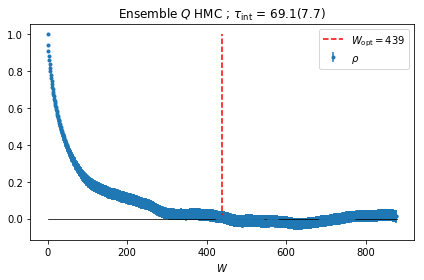

[-0.016713771648025753, 0.030301828198564685]
-0.017(30)


In [4]:
topchargehmc = datahmc[:,3]

corr_qhmc = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_qhmc.primary_observable(0,'$Q$ HMC', [0], ['R0'], [MCtimehmc.tolist()], [(topchargehmc).tolist()], (1,1))

[Qhmc, eQhmc]= corr_qhmc.vwerr(errinfo=einfo)
[tauQhmc, etauQhmc] = corr_qhmc.tauint(errinfo=einfo)
tauQhmc = tauQhmc[0][0][0]
etauQhmc = etauQhmc[0][0][0]

print(corr_qhmc.vwerr(plot=True,errinfo=einfo)) 

printwe(Qhmc,eQhmc)

### $Q^2$

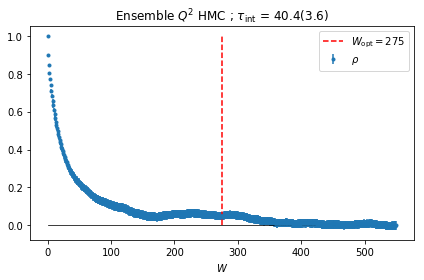

[0.7930374336748971, 0.03361226722602705]
0.793(34)


In [5]:
corr_q2hmc = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q2hmc.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimehmc.tolist()], [(topchargehmc**2).tolist()], (1,1))

[Q2hmc, eQ2hmc]= corr_q2hmc.vwerr(errinfo=einfo)
[tauQ2hmc, etauQ2hmc] = corr_q2hmc.tauint(errinfo=einfo)
tauQ2hmc = tauQ2hmc[0][0][0]
etauQ2hmc = etauQ2hmc[0][0][0]

print(corr_q2hmc.vwerr(plot=True,errinfo=einfo)) 

printwe(Q2hmc,eQ2hmc)

### $Q^4$

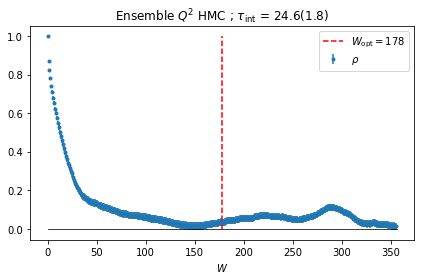

[2.300123097087746, 0.1988694664417481]
2.30(20)


In [6]:
corr_q4hmc = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q4hmc.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimehmc.tolist()], [(topchargehmc**4).tolist()], (1,1))

[Q4hmc, eQ4hmc]= corr_q4hmc.vwerr(errinfo=einfo)
[tauQ4hmc, etauQ4hmc] = corr_q4hmc.tauint(errinfo=einfo)
tauQ4hmc = tauQ4hmc[0][0][0]
etauQ4hmc = etauQ4hmc[0][0][0]

print(corr_q4hmc.vwerr(plot=True,errinfo=einfo)) 

printwe(Q4hmc,eQ4hmc)

### $t^2 E_1$

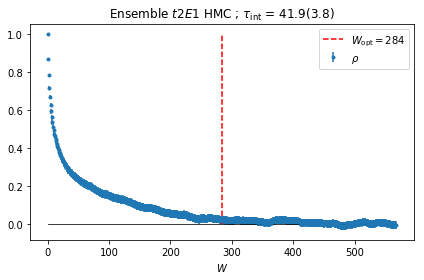

[0.04605568155718363, 5.340279390683394e-05]
0.046056(53)


In [7]:
t2Eat1hmc = datahmc[:,0]

corr_t2Eat1hmc = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat1hmc.primary_observable(0,'$t2E1$ HMC', [0], ['R0'], [MCtimehmc.tolist()], [(t2Eat1hmc).tolist()], (1,1))

[t2E1hmc, et2E1hmc]= corr_t2Eat1hmc.vwerr(errinfo=einfo)
[taut2E1hmc, etaut2E1hmc] = corr_t2Eat1hmc.tauint(errinfo=einfo)
taut2E1hmc = taut2E1hmc[0][0][0]
etaut2E1hmc = etaut2E1hmc[0][0][0]

print(corr_t2Eat1hmc.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E1hmc,et2E1hmc)

### $t^2 E_5$

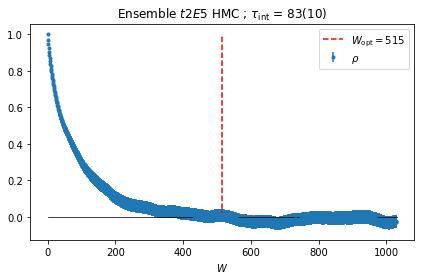

[0.12832411446142708, 0.0011944908531617557]
0.1283(12)


In [8]:
t2Eat5hmc = datahmc[:,1]

corr_t2Eat5hmc = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat5hmc.primary_observable(0,'$t2E5$ HMC', [0], ['R0'], [MCtimehmc.tolist()], [(t2Eat5hmc).tolist()], (1,1))

[t2E5hmc, et2E5hmc]= corr_t2Eat5hmc.vwerr(errinfo=einfo)
[taut2E5hmc, etaut2E5hmc] = corr_t2Eat5hmc.tauint(errinfo=einfo)
taut2E5hmc = taut2E5hmc[0][0][0]
etaut2E5hmc = etaut2E5hmc[0][0][0]

print(corr_t2Eat5hmc.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E5hmc,et2E5hmc)

### $t^2 E_7$

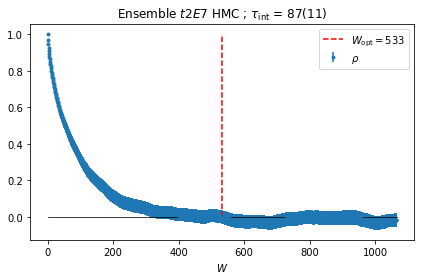

[0.17622224728483446, 0.0022346292581767115]
0.1762(22)


In [9]:
t2Eat7hmc = datahmc[:,2]

corr_t2Eat7hmc = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat7hmc.primary_observable(0,'$t2E7$ HMC', [0], ['R0'], [MCtimehmc.tolist()], [(t2Eat7hmc).tolist()], (1,1))

[t2E7hmc, et2E7hmc]= corr_t2Eat7hmc.vwerr(errinfo=einfo)
[taut2E7hmc, etaut2E7hmc] = corr_t2Eat7hmc.tauint(errinfo=einfo)
taut2E7hmc = taut2E7hmc[0][0][0]
etaut2E7hmc = etaut2E7hmc[0][0][0]

print(corr_t2Eat7hmc.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E7hmc,et2E7hmc)

## Alt Winding 5

### $Q$

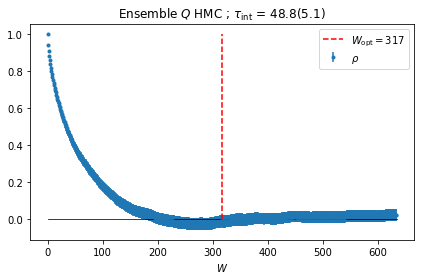

[-0.038691015264781733, 0.0269184927887974]
-0.039(27)


In [10]:
topchargealtw = dataaltw[:,3]

corr_qaltw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_qaltw.primary_observable(0,'$Q$ HMC', [0], ['R0'], [MCtimealtw.tolist()], [(topchargealtw).tolist()], (1,1))

[Qaltw, eQaltw]= corr_qaltw.vwerr(errinfo=einfo)
[tauQaltw, etauQaltw] = corr_qaltw.tauint(errinfo=einfo)
tauQaltw = tauQaltw[0][0][0]
etauQaltw = etauQaltw[0][0][0]

print(corr_qaltw.vwerr(plot=True,errinfo=einfo)) 

printwe(Qaltw,eQaltw)

tauR_Qaltw = tauQaltw/tauQhmc
etauR_Qaltw = tauR_Qaltw *  np.sqrt( (etauQhmc/tauQhmc)**2.0 + (etauQaltw/tauQaltw)**2.0 )

### $Q^2$

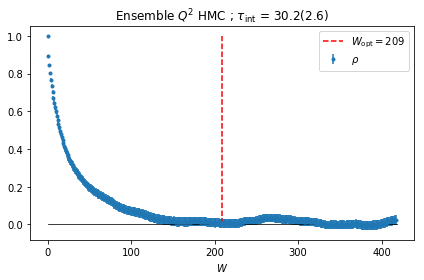

[0.7394708352785152, 0.029822075692472437]
0.739(30)


In [11]:
corr_q2altw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q2altw.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimealtw.tolist()], [(topchargealtw**2).tolist()], (1,1))

[Q2altw, eQ2altw]= corr_q2altw.vwerr(errinfo=einfo)
[tauQ2altw, etauQ2altw] = corr_q2altw.tauint(errinfo=einfo)
tauQ2altw = tauQ2altw[0][0][0]
etauQ2altw = etauQ2altw[0][0][0]

print(corr_q2altw.vwerr(plot=True,errinfo=einfo)) 

printwe(Q2altw,eQ2altw)

tauR_Q2altw = tauQ2altw/tauQ2hmc
etauR_Q2altw = tauR_Q2altw *  np.sqrt( (etauQ2hmc/tauQ2hmc)**2.0 + (etauQ2altw/tauQ2altw)**2.0 )

### $Q^4$

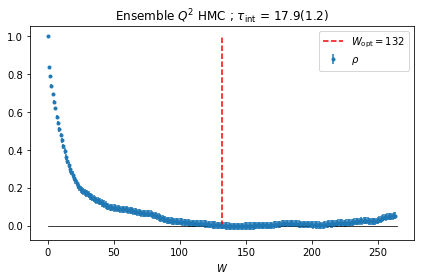

[2.0118047487608024, 0.16081566292503374]
2.01(16)


In [12]:
corr_q4altw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q4altw.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimealtw.tolist()], [(topchargealtw**4).tolist()], (1,1))

[Q4altw, eQ4altw]= corr_q4altw.vwerr(errinfo=einfo)
[tauQ4altw, etauQ4altw] = corr_q4altw.tauint(errinfo=einfo)
tauQ4altw = tauQ4altw[0][0][0]
etauQ4altw = etauQ4altw[0][0][0]

print(corr_q4altw.vwerr(plot=True,errinfo=einfo)) 

printwe(Q4altw,eQ4altw)

tauR_Q4altw = tauQ4altw/tauQ4hmc
etauR_Q4altw = tauR_Q4altw *  np.sqrt( (etauQ4hmc/tauQ4hmc)**2.0 + (etauQ4altw/tauQ4altw)**2.0 )

### $t^2 E_1$

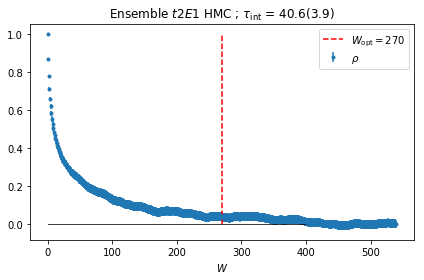

[0.04588797445643763, 5.748102694972796e-05]
0.045888(57)


In [13]:
t2Eat1altw = dataaltw[:,0]

corr_t2Eat1altw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat1altw.primary_observable(0,'$t2E1$ HMC', [0], ['R0'], [MCtimealtw.tolist()], [(t2Eat1altw).tolist()], (1,1))

[t2E1altw, et2E1altw]= corr_t2Eat1altw.vwerr(errinfo=einfo)
[taut2E1altw, etaut2E1altw] = corr_t2Eat1altw.tauint(errinfo=einfo)
taut2E1altw = taut2E1altw[0][0][0]
etaut2E1altw = etaut2E1altw[0][0][0]

print(corr_t2Eat1altw.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E1altw,et2E1altw)

tauR_t2E1altw = taut2E1altw/taut2E1hmc
etauR_t2E1altw = tauR_t2E1altw *  np.sqrt( (etaut2E1hmc/taut2E1hmc)**2.0 + (etaut2E1altw/taut2E1altw)**2.0 )

### $t^2 E_5$

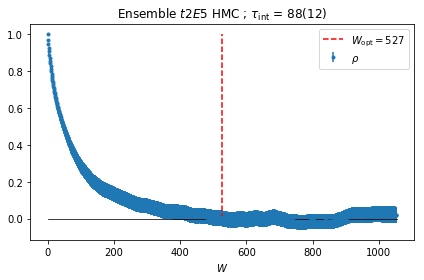

[0.12432159761052652, 0.0013450560223878473]
0.1243(13)


In [14]:
t2Eat5altw = dataaltw[:,1]

corr_t2Eat5altw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat5altw.primary_observable(0,'$t2E5$ HMC', [0], ['R0'], [MCtimealtw.tolist()], [(t2Eat5altw).tolist()], (1,1))

[t2E5altw, et2E5altw]= corr_t2Eat5altw.vwerr(errinfo=einfo)
[taut2E5altw, etaut2E5altw] = corr_t2Eat5altw.tauint(errinfo=einfo)
taut2E5altw = taut2E5altw[0][0][0]
etaut2E5altw = etaut2E5altw[0][0][0]

print(corr_t2Eat5altw.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E5altw,et2E5altw)

tauR_t2E5altw = taut2E5altw/taut2E5hmc
etauR_t2E5altw = tauR_t2E5altw *  np.sqrt( (etaut2E5hmc/taut2E5hmc)**2.0 + (etaut2E5altw/taut2E5altw)**2.0 )

### $t^2 E_7$

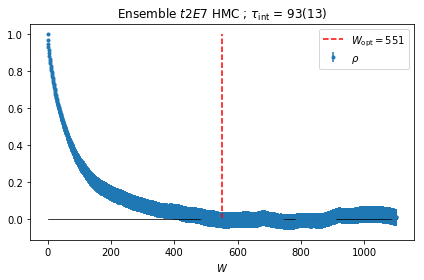

[0.16863215611491342, 0.0025374709758275537]
0.1686(25)


In [15]:
t2Eat7altw = dataaltw[:,2]

corr_t2Eat7altw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat7altw.primary_observable(0,'$t2E7$ HMC', [0], ['R0'], [MCtimealtw.tolist()], [(t2Eat7altw).tolist()], (1,1))

[t2E7altw, et2E7altw]= corr_t2Eat7altw.vwerr(errinfo=einfo)
[taut2E7altw, etaut2E7altw] = corr_t2Eat7altw.tauint(errinfo=einfo)
taut2E7altw = taut2E7altw[0][0][0]
etaut2E7altw = etaut2E7altw[0][0][0]

print(corr_t2Eat7altw.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E7altw,et2E7altw)

tauR_t2E7altw = taut2E7altw/taut2E7hmc
etauR_t2E7altw = tauR_t2E7altw *  np.sqrt( (etaut2E7hmc/taut2E7hmc)**2.0 + (etaut2E7altw/taut2E7altw)**2.0 )

## Alt Winding 2

### $Q$

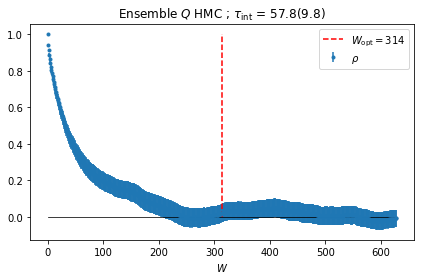

[0.00761042855436051, 0.05074271292097507]
0.008(51)


In [16]:
topchargealtw2 = dataaltw2[:,3]

corr_qaltw2 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_qaltw2.primary_observable(0,'$Q$ HMC', [0], ['R0'], [MCtimealtw2.tolist()], [(topchargealtw2).tolist()], (1,1))

[Qaltw2, eQaltw2]= corr_qaltw2.vwerr(errinfo=einfo)
[tauQaltw2, etauQaltw2] = corr_qaltw2.tauint(errinfo=einfo)
tauQaltw2 = tauQaltw2[0][0][0]
etauQaltw2 = etauQaltw2[0][0][0]

print(corr_qaltw2.vwerr(plot=True,errinfo=einfo)) 

printwe(Qaltw2,eQaltw2)

tauR_Qaltw2 = tauQaltw2/tauQhmc
etauR_Qaltw2 = tauR_Qaltw2 *  np.sqrt( (etauQhmc/tauQhmc)**2.0 + (etauQaltw2/tauQaltw2)**2.0 )

### $Q^2$

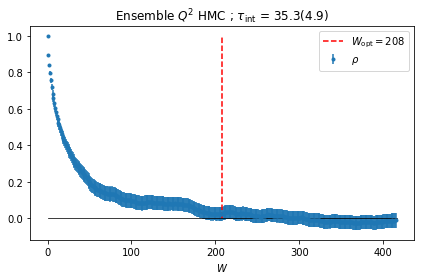

[0.7998948818937305, 0.056962077290997074]
0.800(57)


In [17]:
corr_q2altw2 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q2altw2.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimealtw2.tolist()], [(topchargealtw2**2).tolist()], (1,1))

[Q2altw2, eQ2altw2]= corr_q2altw2.vwerr(errinfo=einfo)
[tauQ2altw2, etauQ2altw2] = corr_q2altw2.tauint(errinfo=einfo)
tauQ2altw2 = tauQ2altw2[0][0][0]
etauQ2altw2 = etauQ2altw2[0][0][0]

print(corr_q2altw2.vwerr(plot=True,errinfo=einfo)) 

printwe(Q2altw2,eQ2altw2)

tauR_Q2altw2 = tauQ2altw2/tauQ2hmc
etauR_Q2altw2 = tauR_Q2altw2 *  np.sqrt( (etauQ2hmc/tauQ2hmc)**2.0 + (etauQ2altw2/tauQ2altw2)**2.0 )

### $Q^4$

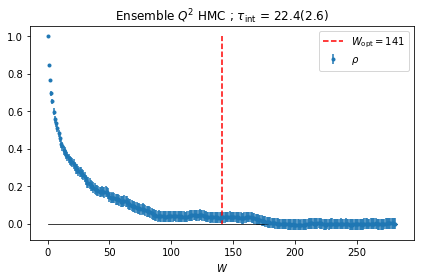

[2.290962512764643, 0.3306444796156692]
2.29(33)


In [18]:
corr_q4altw2 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q4altw2.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimealtw2.tolist()], [(topchargealtw2**4).tolist()], (1,1))

[Q4altw2, eQ4altw2]= corr_q4altw2.vwerr(errinfo=einfo)
[tauQ4altw2, etauQ4altw2] = corr_q4altw2.tauint(errinfo=einfo)
tauQ4altw2 = tauQ4altw2[0][0][0]
etauQ4altw2 = etauQ4altw2[0][0][0]

print(corr_q4altw2.vwerr(plot=True,errinfo=einfo)) 

printwe(Q4altw2,eQ4altw2)

tauR_Q4altw2 = tauQ4altw2/tauQ4hmc
etauR_Q4altw2 = tauR_Q4altw2 *  np.sqrt( (etauQ4hmc/tauQ4hmc)**2.0 + (etauQ4altw2/tauQ4altw2)**2.0 )

### $t^2 E_1$

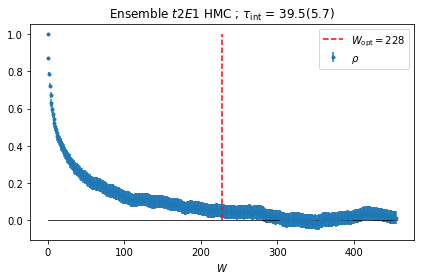

[0.04602536660458333, 9.529735625813286e-05]
0.046025(95)


In [19]:
t2Eat1altw2 = dataaltw2[:,0]

corr_t2Eat1altw2 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat1altw2.primary_observable(0,'$t2E1$ HMC', [0], ['R0'], [MCtimealtw2.tolist()], [(t2Eat1altw2).tolist()], (1,1))

[t2E1altw2, et2E1altw2]= corr_t2Eat1altw2.vwerr(errinfo=einfo)
[taut2E1altw2, etaut2E1altw2] = corr_t2Eat1altw2.tauint(errinfo=einfo)
taut2E1altw2 = taut2E1altw2[0][0][0]
etaut2E1altw2 = etaut2E1altw2[0][0][0]

print(corr_t2Eat1altw2.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E1altw2,et2E1altw2)

tauR_t2E1altw2 = taut2E1altw2/taut2E1hmc
etauR_t2E1altw2 = tauR_t2E1altw2 *  np.sqrt( (etaut2E1hmc/taut2E1hmc)**2.0 + (etaut2E1altw2/taut2E1altw2)**2.0 )

### $t^2 E_5$

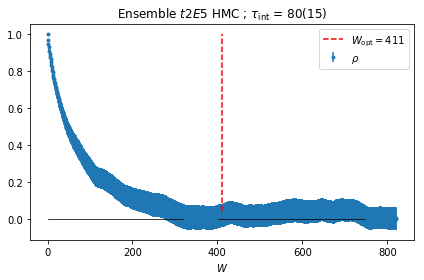

[0.12756317151930555, 0.0021700997308963413]
0.1276(22)


In [20]:
t2Eat5altw2 = dataaltw2[:,1]

corr_t2Eat5altw2 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat5altw2.primary_observable(0,'$t2E5$ HMC', [0], ['R0'], [MCtimealtw2.tolist()], [(t2Eat5altw2).tolist()], (1,1))

[t2E5altw2, et2E5altw2]= corr_t2Eat5altw2.vwerr(errinfo=einfo)
[taut2E5altw2, etaut2E5altw2] = corr_t2Eat5altw2.tauint(errinfo=einfo)
taut2E5altw2 = taut2E5altw2[0][0][0]
etaut2E5altw2 = etaut2E5altw2[0][0][0]

print(corr_t2Eat5altw2.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E5altw2,et2E5altw2)

tauR_t2E5altw2 = taut2E5altw2/taut2E5hmc
etauR_t2E5altw2 = tauR_t2E5altw2 *  np.sqrt( (etaut2E5hmc/taut2E5hmc)**2.0 + (etaut2E5altw2/taut2E5altw2)**2.0 )

### $t^2 E_7$

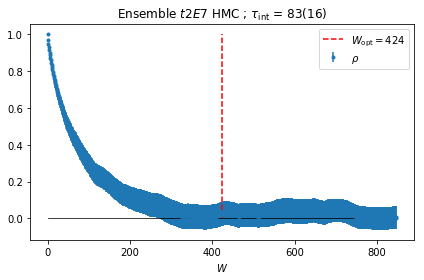

[0.17467002371555554, 0.004049127497476598]
0.1747(40)


In [21]:
t2Eat7altw2 = dataaltw2[:,2]

corr_t2Eat7altw2 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat7altw2.primary_observable(0,'$t2E7$ HMC', [0], ['R0'], [MCtimealtw2.tolist()], [(t2Eat7altw2).tolist()], (1,1))

[t2E7altw2, et2E7altw2]= corr_t2Eat7altw2.vwerr(errinfo=einfo)
[taut2E7altw2, etaut2E7altw2] = corr_t2Eat7altw2.tauint(errinfo=einfo)
taut2E7altw2 = taut2E7altw2[0][0][0]
etaut2E7altw2 = etaut2E7altw2[0][0][0]

print(corr_t2Eat7altw2.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E7altw2,et2E7altw2)

tauR_t2E7altw2 = taut2E7altw2/taut2E7hmc
etauR_t2E7altw2 = tauR_t2E7altw2 *  np.sqrt( (etaut2E7hmc/taut2E7hmc)**2.0 + (etaut2E7altw2/taut2E7altw2)**2.0 )

## Alt Winding 3

### $Q$

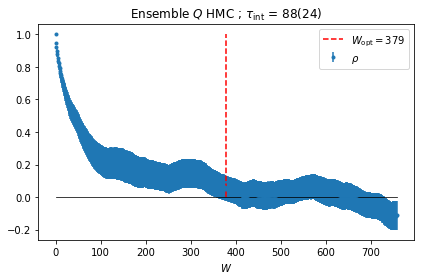

[0.0881918092911571, 0.1007162546917313]
0.09(10)


In [22]:
topchargealtw3 = dataaltw3[:,3]

corr_qaltw3 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_qaltw3.primary_observable(0,'$Q$ HMC', [0], ['R0'], [MCtimealtw3.tolist()], [(topchargealtw3).tolist()], (1,1))

[Qaltw3, eQaltw3]= corr_qaltw3.vwerr(errinfo=einfo)
[tauQaltw3, etauQaltw3] = corr_qaltw3.tauint(errinfo=einfo)
tauQaltw3 = tauQaltw3[0][0][0]
etauQaltw3 = etauQaltw3[0][0][0]

print(corr_qaltw3.vwerr(plot=True,errinfo=einfo)) 

printwe(Qaltw3,eQaltw3)

tauR_Qaltw3 = tauQaltw3/tauQhmc
etauR_Qaltw3 = tauR_Qaltw3 *  np.sqrt( (etauQhmc/tauQhmc)**2.0 + (etauQaltw3/tauQaltw3)**2.0 )

### $Q^2$

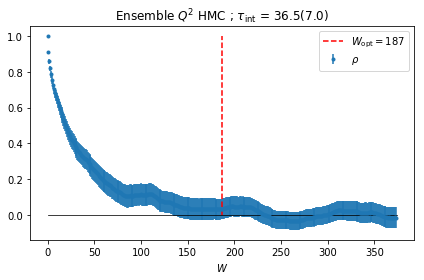

[0.9308668481523776, 0.09380371134165574]
0.931(94)


In [23]:
corr_q2altw3 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q2altw3.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimealtw3.tolist()], [(topchargealtw3**2).tolist()], (1,1))

[Q2altw3, eQ2altw3]= corr_q2altw3.vwerr(errinfo=einfo)
[tauQ2altw3, etauQ2altw3] = corr_q2altw3.tauint(errinfo=einfo)
tauQ2altw3 = tauQ2altw3[0][0][0]
etauQ2altw3 = etauQ2altw3[0][0][0]

print(corr_q2altw3.vwerr(plot=True,errinfo=einfo)) 

printwe(Q2altw3,eQ2altw3)

tauR_Q2altw3 = tauQ2altw3/tauQ2hmc
etauR_Q2altw3 = tauR_Q2altw3 *  np.sqrt( (etauQ2hmc/tauQ2hmc)**2.0 + (etauQ2altw3/tauQ2altw3)**2.0 )

### $Q^4$

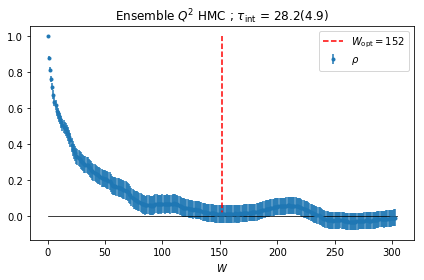

[2.8121241364678635, 0.5729966930492791]
2.81(57)


In [24]:
corr_q4altw3 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q4altw3.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimealtw3.tolist()], [(topchargealtw3**4).tolist()], (1,1))

[Q4altw3, eQ4altw3]= corr_q4altw3.vwerr(errinfo=einfo)
[tauQ4altw3, etauQ4altw3] = corr_q4altw3.tauint(errinfo=einfo)
tauQ4altw3 = tauQ4altw3[0][0][0]
etauQ4altw3 = etauQ4altw3[0][0][0]

print(corr_q4altw3.vwerr(plot=True,errinfo=einfo)) 

printwe(Q4altw3,eQ4altw3)

tauR_Q4altw3 = tauQ4altw3/tauQ4hmc
etauR_Q4altw3 = tauR_Q4altw3 *  np.sqrt( (etauQ4hmc/tauQ4hmc)**2.0 + (etauQ4altw3/tauQ4altw3)**2.0 )

### $t^2 E_1$

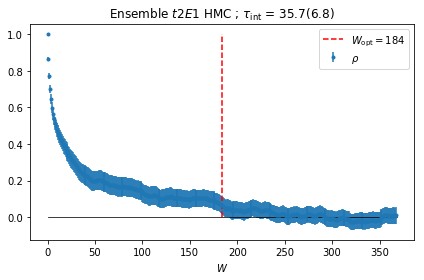

[0.046112706730935336, 0.0001311134688818334]
0.04611(13)


In [25]:
t2Eat1altw3 = dataaltw3[:,0]

corr_t2Eat1altw3 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat1altw3.primary_observable(0,'$t2E1$ HMC', [0], ['R0'], [MCtimealtw3.tolist()], [(t2Eat1altw3).tolist()], (1,1))

[t2E1altw3, et2E1altw3]= corr_t2Eat1altw3.vwerr(errinfo=einfo)
[taut2E1altw3, etaut2E1altw3] = corr_t2Eat1altw3.tauint(errinfo=einfo)
taut2E1altw3 = taut2E1altw3[0][0][0]
etaut2E1altw3 = etaut2E1altw3[0][0][0]

print(corr_t2Eat1altw3.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E1altw3,et2E1altw3)

tauR_t2E1altw3 = taut2E1altw3/taut2E1hmc
etauR_t2E1altw3 = tauR_t2E1altw3 *  np.sqrt( (etaut2E1hmc/taut2E1hmc)**2.0 + (etaut2E1altw3/taut2E1altw3)**2.0 )

### $t^2 E_5$

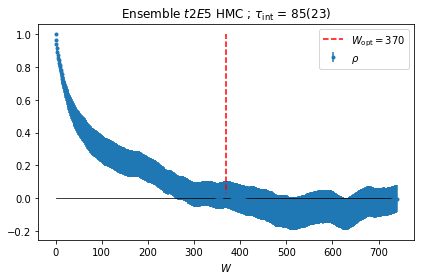

[0.12952957082891162, 0.003174099771755187]
0.1295(32)


In [26]:
t2Eat5altw3 = dataaltw3[:,1]

corr_t2Eat5altw3 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat5altw3.primary_observable(0,'$t2E5$ HMC', [0], ['R0'], [MCtimealtw3.tolist()], [(t2Eat5altw3).tolist()], (1,1))

[t2E5altw3, et2E5altw3]= corr_t2Eat5altw3.vwerr(errinfo=einfo)
[taut2E5altw3, etaut2E5altw3] = corr_t2Eat5altw3.tauint(errinfo=einfo)
taut2E5altw3 = taut2E5altw3[0][0][0]
etaut2E5altw3 = etaut2E5altw3[0][0][0]

print(corr_t2Eat5altw3.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E5altw3,et2E5altw3)

tauR_t2E5altw3 = taut2E5altw3/taut2E5hmc
etauR_t2E5altw3 = tauR_t2E5altw3 *  np.sqrt( (etaut2E5hmc/taut2E5hmc)**2.0 + (etaut2E5altw3/taut2E5altw3)**2.0 )

### $t^2 E_7$

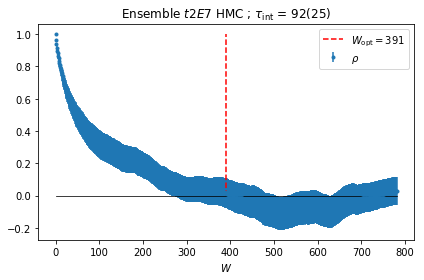

[0.17809759589986424, 0.00601109617695468]
0.1781(60)


In [27]:
t2Eat7altw3 = dataaltw3[:,2]

corr_t2Eat7altw3 = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat7altw3.primary_observable(0,'$t2E7$ HMC', [0], ['R0'], [MCtimealtw3.tolist()], [(t2Eat7altw3).tolist()], (1,1))

[t2E7altw3, et2E7altw3]= corr_t2Eat7altw3.vwerr(errinfo=einfo)
[taut2E7altw3, etaut2E7altw3] = corr_t2Eat7altw3.tauint(errinfo=einfo)
taut2E7altw3 = taut2E7altw3[0][0][0]
etaut2E7altw3 = etaut2E7altw3[0][0][0]

print(corr_t2Eat7altw3.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E7altw3,et2E7altw3)

tauR_t2E7altw3 = taut2E7altw3/taut2E7hmc
etauR_t2E7altw3 = tauR_t2E7altw3 *  np.sqrt( (etaut2E7hmc/taut2E7hmc)**2.0 + (etaut2E7altw3/taut2E7altw3)**2.0 )

## Doub Alt Winding

### $Q$

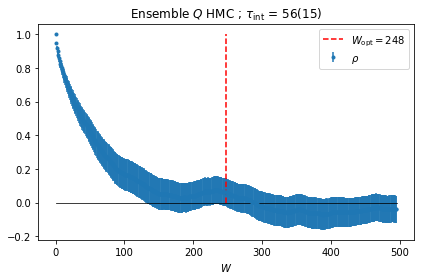

[-0.11398082899134442, 0.09497839032194547]
-0.114(95)


In [28]:
topchargedoubaltw = datadoubaltw[:,3]

corr_qdoubaltw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_qdoubaltw.primary_observable(0,'$Q$ HMC', [0], ['R0'], [MCtimedoubaltw.tolist()], [(topchargedoubaltw).tolist()], (1,1))

[Qdoubaltw, eQdoubaltw]= corr_qdoubaltw.vwerr(errinfo=einfo)
[tauQdoubaltw, etauQdoubaltw] = corr_qdoubaltw.tauint(errinfo=einfo)
tauQdoubaltw = tauQdoubaltw[0][0][0]
etauQdoubaltw = etauQdoubaltw[0][0][0]

print(corr_qdoubaltw.vwerr(plot=True,errinfo=einfo)) 

printwe(Qdoubaltw,eQdoubaltw)

tauR_Qdoubaltw = tauQdoubaltw/tauQhmc
etauR_Qdoubaltw = tauR_Qdoubaltw *  np.sqrt( (etauQhmc/tauQhmc)**2.0 + (etauQdoubaltw/tauQdoubaltw)**2.0 )

### $Q^2$

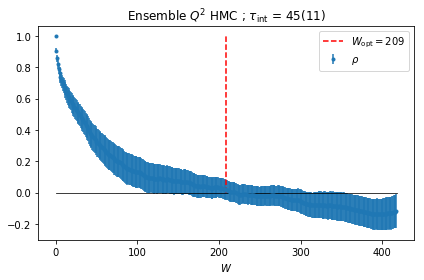

[0.9254346526196117, 0.12687038633526182]
0.93(13)


In [29]:
corr_q2doubaltw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q2doubaltw.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimedoubaltw.tolist()], [(topchargedoubaltw**2).tolist()], (1,1))

[Q2doubaltw, eQ2doubaltw]= corr_q2doubaltw.vwerr(errinfo=einfo)
[tauQ2doubaltw, etauQ2doubaltw] = corr_q2doubaltw.tauint(errinfo=einfo)
tauQ2doubaltw = tauQ2doubaltw[0][0][0]
etauQ2doubaltw = etauQ2doubaltw[0][0][0]

print(corr_q2doubaltw.vwerr(plot=True,errinfo=einfo)) 

printwe(Q2doubaltw,eQ2doubaltw)

tauR_Q2doubaltw = tauQ2doubaltw/tauQ2hmc
etauR_Q2doubaltw = tauR_Q2doubaltw *  np.sqrt( (etauQ2hmc/tauQ2hmc)**2.0 + (etauQ2doubaltw/tauQ2doubaltw)**2.0 )

### $Q^4$

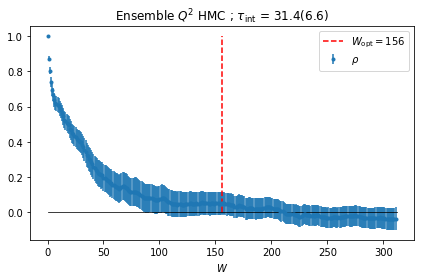

[2.8861078919361307, 0.6656220257875154]
2.89(67)


In [30]:
corr_q4doubaltw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q4doubaltw.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimedoubaltw.tolist()], [(topchargedoubaltw**4).tolist()], (1,1))

[Q4doubaltw, eQ4doubaltw]= corr_q4doubaltw.vwerr(errinfo=einfo)
[tauQ4doubaltw, etauQ4doubaltw] = corr_q4doubaltw.tauint(errinfo=einfo)
tauQ4doubaltw = tauQ4doubaltw[0][0][0]
etauQ4doubaltw = etauQ4doubaltw[0][0][0]

print(corr_q4doubaltw.vwerr(plot=True,errinfo=einfo)) 

printwe(Q4doubaltw,eQ4doubaltw)

tauR_Q4doubaltw = tauQ4doubaltw/tauQ4hmc
etauR_Q4doubaltw = tauR_Q4doubaltw *  np.sqrt( (etauQ4hmc/tauQ4hmc)**2.0 + (etauQ4doubaltw/tauQ4doubaltw)**2.0 )

### $t^2 E_1$

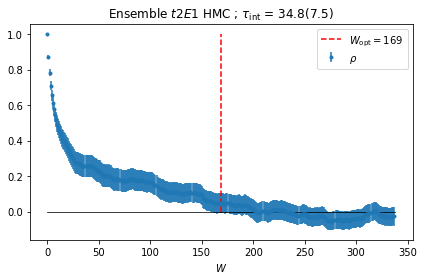

[0.04602245327623686, 0.00015902726519847717]
0.04602(16)


In [31]:
t2Eat1doubaltw = datadoubaltw[:,0]

corr_t2Eat1doubaltw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat1doubaltw.primary_observable(0,'$t2E1$ HMC', [0], ['R0'], [MCtimedoubaltw.tolist()], [(t2Eat1doubaltw).tolist()], (1,1))

[t2E1doubaltw, et2E1doubaltw]= corr_t2Eat1doubaltw.vwerr(errinfo=einfo)
[taut2E1doubaltw, etaut2E1doubaltw] = corr_t2Eat1doubaltw.tauint(errinfo=einfo)
taut2E1doubaltw = taut2E1doubaltw[0][0][0]
etaut2E1doubaltw = etaut2E1doubaltw[0][0][0]

print(corr_t2Eat1doubaltw.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E1doubaltw,et2E1doubaltw)

tauR_t2E1doubaltw = taut2E1doubaltw/taut2E1hmc
etauR_t2E1doubaltw = tauR_t2E1doubaltw *  np.sqrt( (etaut2E1hmc/taut2E1hmc)**2.0 + (etaut2E1doubaltw/taut2E1doubaltw)**2.0 )

### $t^2 E_5$

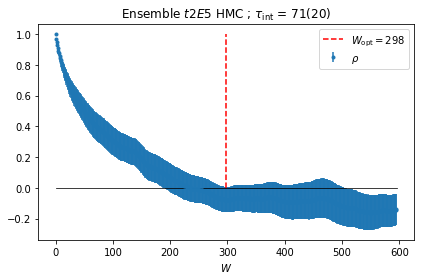

[0.129207852427615, 0.0036436330737654506]
0.1292(36)


In [32]:
t2Eat5doubaltw = datadoubaltw[:,1]

corr_t2Eat5doubaltw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat5doubaltw.primary_observable(0,'$t2E5$ HMC', [0], ['R0'], [MCtimedoubaltw.tolist()], [(t2Eat5doubaltw).tolist()], (1,1))

[t2E5doubaltw, et2E5doubaltw]= corr_t2Eat5doubaltw.vwerr(errinfo=einfo)
[taut2E5doubaltw, etaut2E5doubaltw] = corr_t2Eat5doubaltw.tauint(errinfo=einfo)
taut2E5doubaltw = taut2E5doubaltw[0][0][0]
etaut2E5doubaltw = etaut2E5doubaltw[0][0][0]

print(corr_t2Eat5doubaltw.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E5doubaltw,et2E5doubaltw)

tauR_t2E5doubaltw = taut2E5doubaltw/taut2E5hmc
etauR_t2E5doubaltw = tauR_t2E5doubaltw *  np.sqrt( (etaut2E5hmc/taut2E5hmc)**2.0 + (etaut2E5doubaltw/taut2E5doubaltw)**2.0 )

### $t^2 E_7$

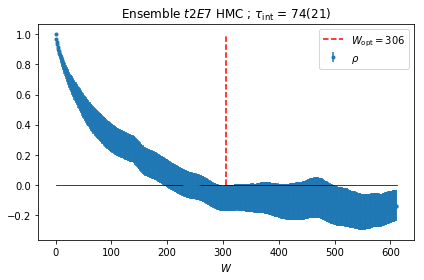

[0.17821734623467525, 0.006845784626201876]
0.1782(68)


In [33]:
t2Eat7doubaltw = datadoubaltw[:,2]

corr_t2Eat7doubaltw = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat7doubaltw.primary_observable(0,'$t2E7$ HMC', [0], ['R0'], [MCtimedoubaltw.tolist()], [(t2Eat7doubaltw).tolist()], (1,1))

[t2E7doubaltw, et2E7doubaltw]= corr_t2Eat7doubaltw.vwerr(errinfo=einfo)
[taut2E7doubaltw, etaut2E7doubaltw] = corr_t2Eat7doubaltw.tauint(errinfo=einfo)
taut2E7doubaltw = taut2E7doubaltw[0][0][0]
etaut2E7doubaltw = etaut2E7doubaltw[0][0][0]

print(corr_t2Eat7doubaltw.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E7doubaltw,et2E7doubaltw)

tauR_t2E7doubaltw = taut2E7doubaltw/taut2E7hmc
etauR_t2E7doubaltw = tauR_t2E7doubaltw *  np.sqrt( (etaut2E7hmc/taut2E7hmc)**2.0 + (etaut2E7doubaltw/taut2E7doubaltw)**2.0 )

## Alt Instanton

### $Q$

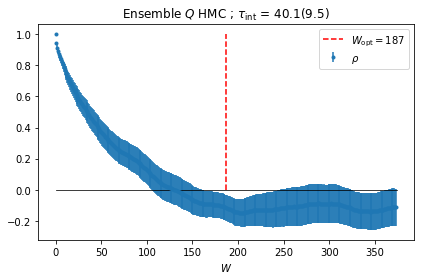

[0.11113434755785634, 0.07664619709657909]
0.111(77)


In [34]:
topchargealti = dataalti[:,3]

corr_qalti = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_qalti.primary_observable(0,'$Q$ HMC', [0], ['R0'], [MCtimealti.tolist()], [(topchargealti).tolist()], (1,1))

[Qalti, eQalti]= corr_qalti.vwerr(errinfo=einfo)
[tauQalti, etauQalti] = corr_qalti.tauint(errinfo=einfo)
tauQalti = tauQalti[0][0][0]
etauQalti = etauQalti[0][0][0]

print(corr_qalti.vwerr(plot=True,errinfo=einfo)) 

printwe(Qalti,eQalti)

tauR_Qalti = tauQalti/tauQhmc
etauR_Qalti = tauR_Qalti *  np.sqrt( (etauQhmc/tauQhmc)**2.0 + (etauQalti/tauQalti)**2.0 )

### $Q^2$

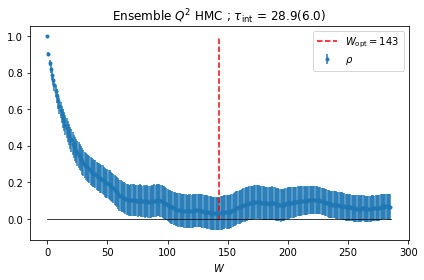

[0.7750937250154898, 0.09419404052825071]
0.775(94)


In [35]:
corr_q2alti = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q2alti.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimealti.tolist()], [(topchargealti**2).tolist()], (1,1))

[Q2alti, eQ2alti]= corr_q2alti.vwerr(errinfo=einfo)
[tauQ2alti, etauQ2alti] = corr_q2alti.tauint(errinfo=einfo)
tauQ2alti = tauQ2alti[0][0][0]
etauQ2alti = etauQ2alti[0][0][0]

print(corr_q2alti.vwerr(plot=True,errinfo=einfo)) 

printwe(Q2alti,eQ2alti)

tauR_Q2alti = tauQ2alti/tauQ2hmc
etauR_Q2alti = tauR_Q2alti *  np.sqrt( (etauQ2hmc/tauQ2hmc)**2.0 + (etauQ2alti/tauQ2alti)**2.0 )

### $Q^4$

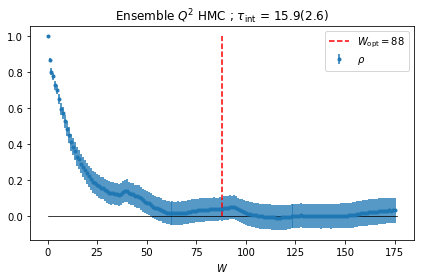

[2.2047403229625977, 0.4663653478657615]
2.20(47)


In [36]:
corr_q4alti = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_q4alti.primary_observable(0,'$Q^2$ HMC', [0], ['R0'], [MCtimealti.tolist()], [(topchargealti**4).tolist()], (1,1))

[Q4alti, eQ4alti]= corr_q4alti.vwerr(errinfo=einfo)
[tauQ4alti, etauQ4alti] = corr_q4alti.tauint(errinfo=einfo)
tauQ4alti = tauQ4alti[0][0][0]
etauQ4alti = etauQ4alti[0][0][0]

print(corr_q4alti.vwerr(plot=True,errinfo=einfo)) 

printwe(Q4alti,eQ4alti)

tauR_Q4alti = tauQ4alti/tauQ4hmc
etauR_Q4alti = tauR_Q4alti *  np.sqrt( (etauQ4hmc/tauQ4hmc)**2.0 + (etauQ4alti/tauQ4alti)**2.0 )

### $t^2 E_1$

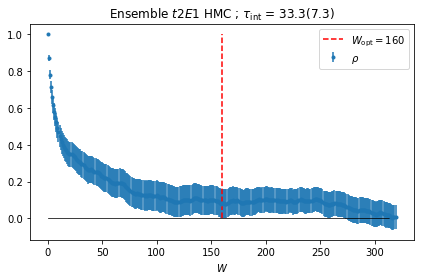

[0.045939999219121994, 0.00016242203742417976]
0.04594(16)


In [37]:
t2Eat1alti = dataalti[:,0]

corr_t2Eat1alti = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat1alti.primary_observable(0,'$t2E1$ HMC', [0], ['R0'], [MCtimealti.tolist()], [(t2Eat1alti).tolist()], (1,1))

[t2E1alti, et2E1alti]= corr_t2Eat1alti.vwerr(errinfo=einfo)
[taut2E1alti, etaut2E1alti] = corr_t2Eat1alti.tauint(errinfo=einfo)
taut2E1alti = taut2E1alti[0][0][0]
etaut2E1alti = etaut2E1alti[0][0][0]

print(corr_t2Eat1alti.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E1alti,et2E1alti)

tauR_t2E1alti = taut2E1alti/taut2E1hmc
etauR_t2E1alti = tauR_t2E1alti *  np.sqrt( (etaut2E1hmc/taut2E1hmc)**2.0 + (etaut2E1alti/taut2E1alti)**2.0 )

### $t^2 E_5$

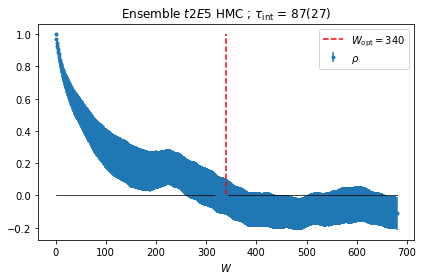

[0.12597265684506234, 0.00419381183424446]
0.1260(42)


In [38]:
t2Eat5alti = dataalti[:,1]

corr_t2Eat5alti = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat5alti.primary_observable(0,'$t2E5$ HMC', [0], ['R0'], [MCtimealti.tolist()], [(t2Eat5alti).tolist()], (1,1))

[t2E5alti, et2E5alti]= corr_t2Eat5alti.vwerr(errinfo=einfo)
[taut2E5alti, etaut2E5alti] = corr_t2Eat5alti.tauint(errinfo=einfo)
taut2E5alti = taut2E5alti[0][0][0]
etaut2E5alti = etaut2E5alti[0][0][0]

print(corr_t2Eat5alti.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E5alti,et2E5alti)

tauR_t2E5alti = taut2E5alti/taut2E5hmc
etauR_t2E5alti = tauR_t2E5alti *  np.sqrt( (etaut2E5hmc/taut2E5hmc)**2.0 + (etaut2E5alti/taut2E5alti)**2.0 )

### $t^2 E_7$

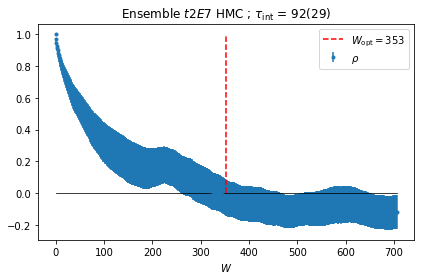

[0.17138783038377298, 0.007873018831805505]
0.1714(79)


In [39]:
t2Eat7alti = dataalti[:,2]

corr_t2Eat7alti = observa()
einfo = errinfo()
einfo.addEnsemble(0, Stau=1.5)
corr_t2Eat7alti.primary_observable(0,'$t2E7$ HMC', [0], ['R0'], [MCtimealti.tolist()], [(t2Eat7alti).tolist()], (1,1))

[t2E7alti, et2E7alti]= corr_t2Eat7alti.vwerr(errinfo=einfo)
[taut2E7alti, etaut2E7alti] = corr_t2Eat7alti.tauint(errinfo=einfo)
taut2E7alti = taut2E7alti[0][0][0]
etaut2E7alti = etaut2E7alti[0][0][0]

print(corr_t2Eat7alti.vwerr(plot=True,errinfo=einfo)) 

printwe(t2E7alti,et2E7alti)

tauR_t2E7alti = taut2E7alti/taut2E7hmc
etauR_t2E7alti = tauR_t2E7alti *  np.sqrt( (etaut2E7hmc/taut2E7hmc)**2.0 + (etaut2E7alti/taut2E7alti)**2.0 )